In [1]:
DATA_DIR = '/datasets/kaggle/planet/'
OUT_DIR = './out'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
if not os.path.isdir(OUT_DIR): os.makedirs(OUT_DIR)

In [4]:
sample_df = pd.read_csv('./sample_submission_v2.csv')
sample_df.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [6]:
train_df = pd.read_csv(DATA_DIR + '/train_v2.csv')
train_df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [7]:
tags_d = {}

for tags in train_df['tags'].values:
    for tag in tags.split(' '):
        if tags_d.get(tag) is None:
            tags_d[tag] = 0
        tags_d[tag] += 1

tags_d

{'agriculture': 12315,
 'artisinal_mine': 339,
 'bare_ground': 862,
 'blooming': 332,
 'blow_down': 101,
 'clear': 28431,
 'cloudy': 2089,
 'conventional_mine': 100,
 'cultivation': 4547,
 'habitation': 3660,
 'haze': 2697,
 'partly_cloudy': 7261,
 'primary': 37513,
 'road': 8071,
 'selective_logging': 340,
 'slash_burn': 209,
 'water': 7411}

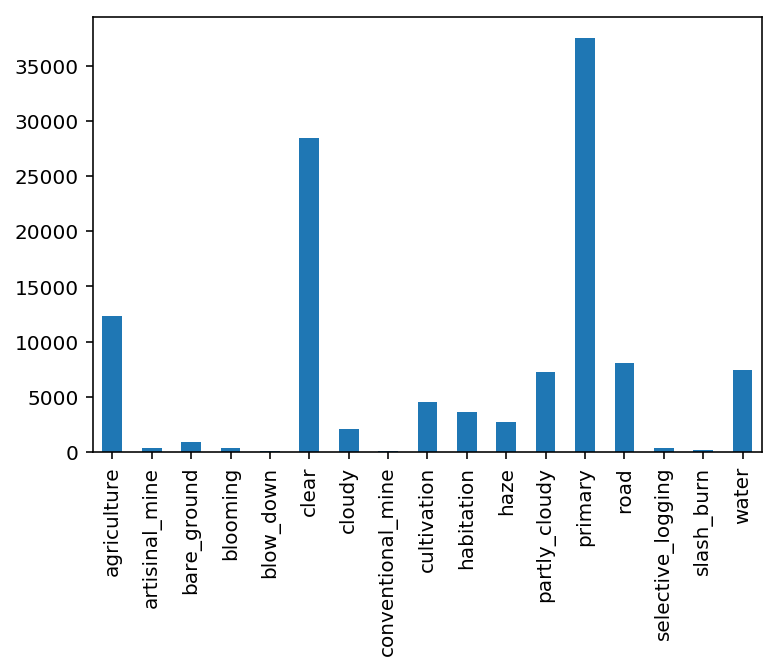

In [8]:
pd.Series(tags_d).plot.bar()

In [8]:
train_df['tags_split'] = [x.split(' ') for x in train_df['tags'].values]
del train_df['tags']

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
m = MultiLabelBinarizer()
v = m.fit_transform(train_df['tags_split'])
m.classes_

array(['agriculture', 'artisinal_mine', 'bare_ground', 'blooming',
       'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation',
       'habitation', 'haze', 'partly_cloudy', 'primary', 'road',
       'selective_logging', 'slash_burn', 'water'], dtype=object)

In [10]:
train_df['tags_binarized'] = pd.Series(v.tolist())
train_df.head()

,image_name,tags_split,tags_binarized
0,train_0,"[haze, primary]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ..."
1,train_1,"[agriculture, clear, primary, water]","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,train_2,"[clear, primary]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
3,train_3,"[clear, primary]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
4,train_4,"[agriculture, clear, habitation, primary, road]","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, ..."


In [11]:
train_df.to_csv(OUT_DIR + '/train.csv')

In [12]:
np.save(OUT_DIR + '/classes.npy', m.classes_)

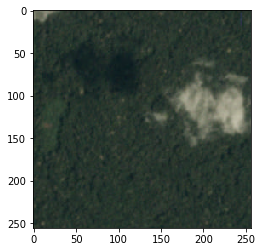

In [33]:
plt.imshow(plt.imread('/datasets/kaggle/planet/train-jpg/train_99.jpg'))

In [28]:
np.mean(plt.imread('/datasets/kaggle/planet/train-jpg/train_9999.jpg').T[3].T)

255.0

In [ ]:
# todo:
# - read geotiffs
# - separate head for: weather (softmax on output)

In [34]:
pd.read_csv('/datasets/kaggle/planet/test_v2_file_mapping.csv')

,old,new
0,file_4158.tif,file_18830.tif
1,file_1668.tif,file_19164.tif
2,file_2411.tif,file_15749.tif
3,file_16047.tif,file_7531.tif
4,file_1271.tif,file_18347.tif
5,file_5652.tif,file_11838.tif
6,file_15144.tif,file_2349.tif
7,file_4714.tif,file_7479.tif
8,file_16364.tif,file_6613.tif
9,file_4974.tif,file_16062.tif
